# Support Vector Machine
## 1. Importing Libraries


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



- **`numpy`**: A fundamental package for scientific computing in Python, used for numerical operations.
- **`matplotlib.pyplot`**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **`load_iris`**: A function to load the Iris dataset from scikit-learn.
- **`SVC`**: Support Vector Classification model from scikit-learn.
- **`train_test_split`**: A utility function to split data into training and testing sets.
- **`accuracy_score`**: A function to compute the accuracy of a model's predictions.

### 2. Loading and Preparing the Dataset


In [44]:
# Load the Iris dataset
iris = load_iris()
x, y = iris.data[:, :2], iris.target  # Using only the first two features


- **`load_iris()`**: Loads the Iris dataset into a dictionary-like object with `.data` and `.target` attributes.
- **`iris.data[:, :2]`**: Slices the data to use only the first two features (sepal length and sepal width) for simplicity.
- **`iris.target`**: The target labels for classification (species of iris flowers).

### 3. Splitting the Data


In [45]:

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


- **`train_test_split`**: Splits the data into training and test sets.
  - **`x`**: Features to be split.
  - **`y`**: Target labels to be split.
  - **`test_size=0.3`**: 30% of the data is used for testing, and 70% for training.
  - **`random_state=42`**: Seed for random number generator to ensure reproducibility.

### 4. Initializing and Training the SVM Model


In [46]:
# Initialize and train the SVM model
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(x_train, y_train)


SVC(kernel='linear', probability=True)

- **`SVC(kernel='linear', probability=True)`**: Initializes the Support Vector Classification model.
  - **`kernel='linear'`**: Specifies that a linear kernel should be used for the SVM, which means the decision boundary will be a straight line.
  - **`probability=True`**: Enables probability estimates, which requires additional computation but allows you to obtain probabilities for predictions.
- **`svm_clf.fit(x_train, y_train)`**: Trains the SVM model on the training data.

### 5. Creating the Mesh Grid


In [47]:
# Create the mesh grid
x0, x1 = np.meshgrid(np.linspace(x_test[:, 0].min() - 1, x_test[:, 0].max() + 1, 200),
                     np.linspace(x_test[:, 1].min() - 1, x_test[:, 1].max() + 1, 200))


- **`np.linspace(start, stop, num)`**: Generates linearly spaced values between `start` and `stop` with `num` points.
  - **`x_test[:, 0].min() - 1`**: Start value for the x-axis, slightly less than the minimum value of the test set features.
  - **`x_test[:, 0].max() + 1`**: End value for the x-axis, slightly more than the maximum value of the test set features.
  - **`200`**: Number of points to generate.
- **`np.meshgrid(x0, x1)`**: Creates a grid of x and y values over which the decision boundary will be plotted.

### 6. Predicting Probabilities


In [48]:
# Flatten the grid and predict probabilities
grid = np.c_[x0.ravel(), x1.ravel()]
probs = svm_clf.predict_proba(grid)[:, 1].reshape(x0.shape)


- **`np.c_[x0.ravel(), x1.ravel()]`**: Flattens the mesh grid and combines x and y values into a single 2D array suitable for predictions.
- **`svm_clf.predict_proba(grid)`**: Predicts class probabilities for each point in the grid.
- **`[:, 1]`**: Selects the probability of the positive class (class `1`).
- **`.reshape(x0.shape)`**: Reshapes the probabilities to match the shape of the mesh grid for contour plotting.

### 7. Plotting the Decision Boundary

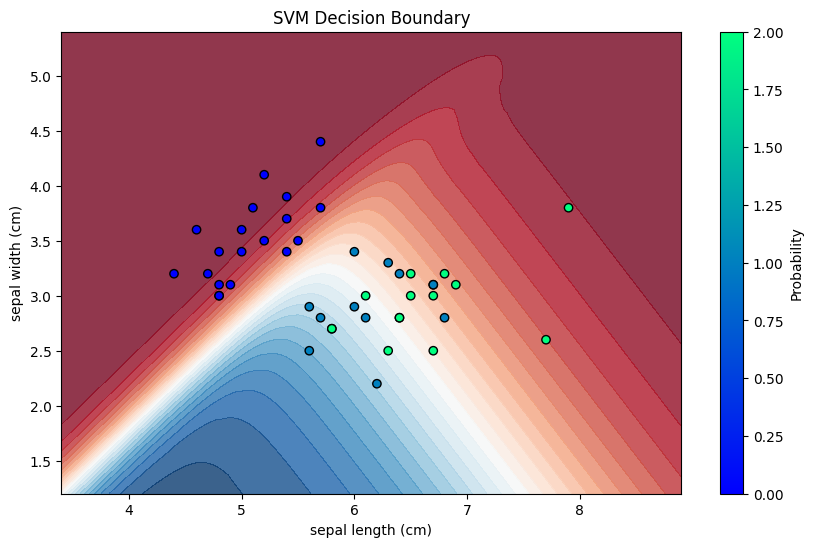

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, probs, 25, cmap='RdBu', alpha=0.8)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='winter', edgecolors='k')
plt.title('SVM Decision Boundary')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Probability')
plt.show()


**`plt.figure(figsize=(10, 6))`**: Creates a new figure with a specified size.
- **`plt.contourf(x0, x1, probs, 25, cmap='RdBu', alpha=0.8)`**: Plots a filled contour plot showing decision boundaries.
  - **`x0, x1`**: Mesh grid coordinates.
  - **`probs`**: Probability values for the grid.
  - **`25`**: Number of contour levels.
  - **`cmap='RdBu'`**: Colormap used for contour levels.
  - **`alpha=0.8`**: Transparency of the contour fill.
- **`plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='winter', edgecolors='k')`**: Plots the test data points.
  - **`c=y_test`**: Colors the points according to their true labels.
  - **`cmap='winter'`**: Colormap for the scatter plot.
  - **`edgecolors='k'`**: Adds black edges to the scatter points.
- **`plt.title('SVM Decision Boundary')`**: Sets the title of the plot.
- **`plt.xlabel(iris.feature_names[0])`**: Labels the x-axis with the name of the first feature.
- **`plt.ylabel(iris.feature_names[1])`**: Labels the y-axis with the name of the second feature.
- **`plt.colorbar(label='Probability')`**: Adds a color bar to the plot with the label 'Probability'.
- **`plt.show()`**: Displays the plot.

This code creates a visualization of the SVM decision boundary, showing how the model classifies different regions in feature space and where it predicts the class probabilities.